In [19]:
#import libraries. 

import os, sys, time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Graphics and options

In [20]:
sns.set()

### Loading Data

In [28]:
pwd

'/Users/awf/Library/CloudStorage/OneDrive-DiversitéAlternative/Formation/OpenClassrooms/Deep Learning & IA/NPL/Analysez vos données textuelles'

In [29]:
ls

Untitled.ipynb         test.csv
sample_submission.csv  train.csv


In [31]:
os.listdir()

['test.csv',
 'NPL - Tweets.ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv']

In [27]:
!tree

zsh:1: command not found: tree


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
#test.head()

In [11]:
#sample_submission.head()

## 2. First Tour

### 2.1 Display Data

In [34]:
df = train.copy()

In [42]:
#df.shape

In [36]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [37]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [39]:
df.sample(10)

,id,keyword,location,text,target
3960,5628,flooding,Vietnam,Cuban leader extends sympathy to Vietnam over ...,1
6276,8967,storm,"Wilmington, NC",New item: Pillow Covers ANY SIZE Pillow Cover ...,0
2166,3107,debris,772 Temperance Permenence,Discovered Plane Debris Is From Missing Malays...,1
2050,2942,danger,ALWAYS DYING NEVER RESTING,SO THIRSTY YALL IN DANGER OF DEHYDRATION,1
7202,10317,weapon,"CT, USA",@Camilla_33 @CrayKain Hate to shatter your del...,0
3409,4879,explode,The Windy City,Is he about to crash?\nDid the Queen die?\nDid...,1
1872,2691,crush,NaN,Only had a crush on one girl in high school an...,0
3039,4361,earthquake,"Oklahoma City, OK",Raffi_RC: RT SustainOurEarth: Oklahoma Acts to...,1
80,117,accident,NaN,mom: 'we didn't get home as fast as we wished'...,0
670,965,blaze,seattle wa,@ChristyCroley Not in the works yet. Did you s...,0


### 2.2 Data Structure 

In [43]:
df.shape

(7613, 5)

In [44]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [46]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [47]:
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [91]:
#df["target"].value_counts()

In [49]:
tmp = df.nunique()
tmp [tmp < 10] 

target    2
dtype: int64

In [50]:
tmp = df.nunique()
tmp [tmp > 1000] 

id          7613
location    3341
text        7503
dtype: int64

### 2.3 Nan and Duplicated 

In [53]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [54]:
df.isnull().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [56]:
df.isnull().mean().sort_values() * 100

id           0.000000
text         0.000000
target       0.000000
keyword      0.801261
location    33.272035
dtype: float64

<AxesSubplot:>

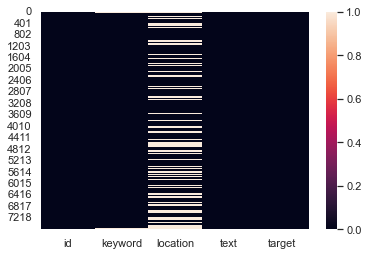

In [57]:
sns.heatmap(df.isnull())

<AxesSubplot:>

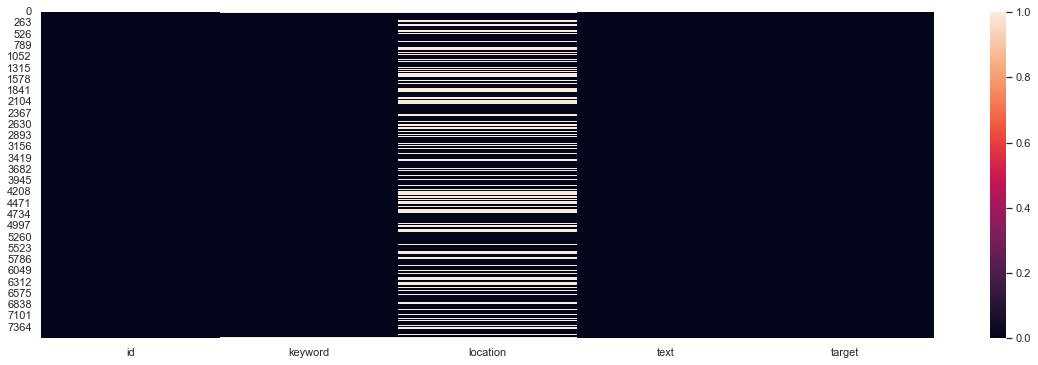

In [59]:
fig, ax =  plt.subplots(1,1, figsize =(20, 6))
sns.heatmap(df.isnull())

In [62]:
df.duplicated().sum()

0

In [63]:
df.duplicated(subset="text").sum()

110

In [68]:
df.duplicated(subset="location").sum()

4271

In [66]:
for col in df.columns :
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} ---> duplicated : {n}")

col : id ---> duplicated : 0
col : keyword ---> duplicated : 7391
col : location ---> duplicated : 4271
col : text ---> duplicated : 110
col : target ---> duplicated : 7611


In [69]:
df.duplicated(subset="text", keep="first")

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609     True
7610     True
7611     True
7612    False
Length: 7613, dtype: bool

In [70]:
idx = df.duplicated(subset="text", keep="first")
df.loc[idx, : ].sort_values("text")

,id,keyword,location,text,target
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
3461,4952,exploded,NaN,that exploded &amp; brought about the\nbeginni...,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1


### 2.4 Data Inspection

In [71]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [72]:
df.describe(include=object)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


## 3. Cleaning

### 3.1 Select columns

In [75]:
tmp = df.dtypes
tmp

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [76]:
cols = ["text", "target"]
df = df[cols]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


### 3.2 Drop NaN

In [78]:
df.isnull().mean()

text      0.0
target    0.0
dtype: float64

### 3.3 Duplicated 

In [79]:
df.shape

(7613, 2)

In [80]:
idx = df.duplicated(subset="text", keep="first")
df.loc[idx, : ].sort_values("text")

,text,target
4299,#Allah describes piling up #wealth thinking it...,0
4312,#Allah describes piling up #wealth thinking it...,1
6366,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...
3461,that exploded &amp; brought about the\nbeginni...,0
6103,that horrible sinking feeling when youÛªve be...,0
6094,that horrible sinking feeling when youÛªve be...,0
6123,that horrible sinking feeling when youÛªve be...,1


In [82]:
df.drop_duplicates(subset="text", inplace=True)

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_2447/2880993212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="text", inplace=True)


In [83]:
df.duplicated(subset="text").sum()

0

##  Exploratory Data Analysis 

### 4.1 Target

In [85]:
df.describe()

,target
count,7503.000000
mean,0.426230
std,0.494561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [88]:
df.target.value_counts()

0    4305
1    3198
Name: target, dtype: int64

In [90]:
df.target.value_counts(normalize=True)

0    0.57377
1    0.42623
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

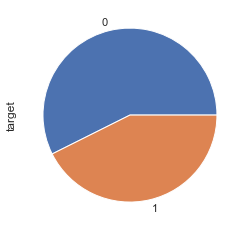

In [93]:
df.target.value_counts(normalize=True).plot(kind="pie")

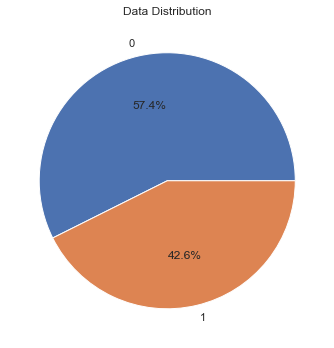

In [92]:
## Plot Uniuqe Target 

plt.figure(figsize=(5,5))
plt.pie(x=df["target"].value_counts().values,labels=df["target"].value_counts().index,autopct='%1.1f%%')
plt.title("Data Distribution")
plt.tight_layout()

### 4.2 Length

In [94]:
df.describe(include="object")

,text
count,7503
unique,7503
top,Our Deeds are the Reason of this #earthquake M...
freq,1


In [97]:
# Méthode 1
df["text"].apply(lambda i : len(i))

0        69
1        38
2       133
3        65
4        88
       ... 
7604    136
7605    114
7606    121
7608     83
7612     94
Name: text, Length: 7503, dtype: int64

/Users/awf/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

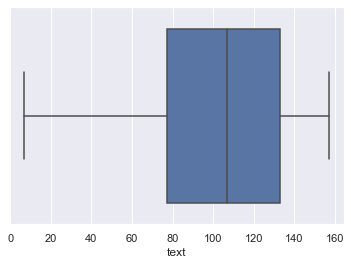

In [99]:
# Méthode 2

tmp = df["text"].str.len()
#tmp
sns.boxplot(tmp)

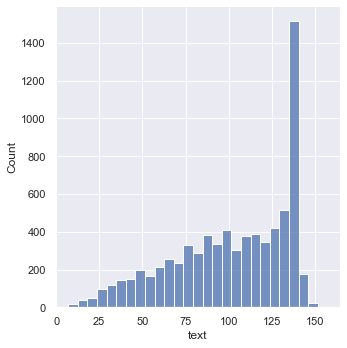

In [100]:
sns.displot(tmp)

In [101]:
df["_len_txt"] = tmp

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_2447/3091308944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_txt"] = tmp


In [102]:
df

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,136
7605,on the flip side I'm at Walmart and there is a...,1,114
7606,Suicide bomber kills 15 in Saudi security site...,1,121
7608,Two giant cranes holding a bridge collapse int...,1,83


### 4.3 Multivariate analysis

In [104]:
corr = df.corr()
corr

,target,_len_txt
target,1.000000,0.180997
_len_txt,0.180997,1.000000


<AxesSubplot:>

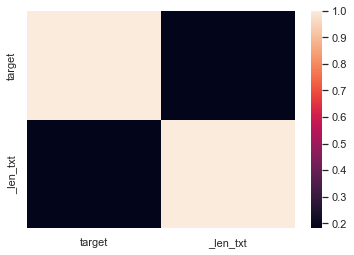

In [105]:
sns.heatmap(corr)

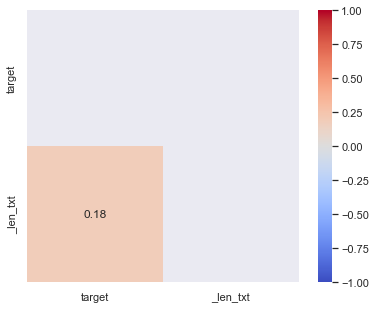

In [115]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

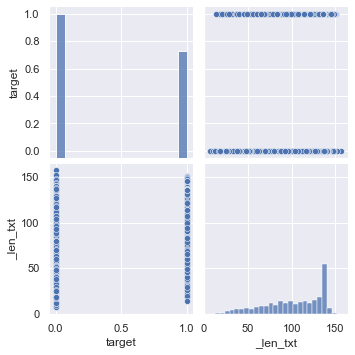

In [117]:
sns.pairplot(df)

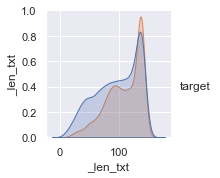

In [121]:
sns.pairplot(df, hue="target")

In [123]:
df.sort_values("_len_txt").head(10)

,text,target,_len_txt
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
4971,Meltdown,0,8
24,LOOOOOOL,0,8
3670,fatality,0,8
30,The end!,0,8
28,Cooool :),0,9
3667,Fatality!,0,9
6705,Thunder???,0,10


In [122]:
df.sort_values("_len_txt").tail(10)

,text,target,_len_txt
261,@Barbi_Twins We need help-horses will die! Ple...,0,148
2301,Nah but srsly b4 u demolish ur partner's face ...,0,148
6945,@helene_yancey GodsLove &amp; #thankU my siste...,1,148
257,@willienelson We need help! Horses will die!Pl...,1,148
2718,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,1,149
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151
4801,It's was about 2:30 in the morning&amp;I went ...,0,152
1270,when you're taking a shower and someone flushe...,0,157


In [125]:
df.drop(columns="_len_txt", inplace=True)

In [126]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [127]:
df.to_csv("df_cleaned.csv", index=True)